# Import all the Dependencies

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import tensorflow as tf

# initializing the CNN

CNN_Classifier=Sequential()

# step 1 convolution
CNN_Classifier.add(Conv2D(32,3,3,input_shape=(64,64,3),activation='relu'))

#Step 2 pooling

CNN_Classifier.add(MaxPooling2D(pool_size=(2,2)))

# step 1 convolution
CNN_Classifier.add(Conv2D(32,3,3,activation='relu'))

#Step 2 pooling

CNN_Classifier.add(MaxPooling2D(pool_size=(2,2)))

# flattening

CNN_Classifier.add(Flatten())

# step 4 Full connection

CNN_Classifier.add(Dense(units=128, activation='relu'))
CNN_Classifier.add(Dense(units=128, activation='sigmoid'))
 
#compiling the cnn()
CNN_Classifier.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Summary

In [27]:
CNN_Classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 21, 21, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 1, 1, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 128)              

# Building and Compiling the Model

In [16]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        r'C:\Users\touheed\Documents\Adatasets\tomato\train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        r'C:\Users\touheed\Documents\Adatasets\tomato\val',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

r=CNN_Classifier.fit(
        training_set,
        steps_per_epoch=len(training_set),
        epochs=100,
        validation_data=test_set,
        
        validation_steps=len(test_set))

Found 10000 images belonging to 10 classes.
Found 1702 images belonging to 10 classes.
Epoch 1/100
313/313 [==============================] - 49s 155ms/step - loss: 0.1756 - accuracy: 0.9364 - val_loss: 0.3506 - val_accuracy: 0.8966
Epoch 2/100
313/313 [==============================] - 62s 198ms/step - loss: 0.1809 - accuracy: 0.9352 - val_loss: 0.3312 - val_accuracy: 0.8942
Epoch 3/100
313/313 [==============================] - 62s 198ms/step - loss: 0.1809 - accuracy: 0.9330 - val_loss: 0.2314 - val_accuracy: 0.9201
Epoch 4/100
313/313 [==============================] - 62s 198ms/step - loss: 0.1697 - accuracy: 0.9380 - val_loss: 0.2741 - val_accuracy: 0.9066
Epoch 5/100
313/313 [==============================] - 62s 198ms/step - loss: 0.1831 - accuracy: 0.9335 - val_loss: 0.2657 - val_accuracy: 0.9148
Epoch 6/100
313/313 [==============================] - 62s 199ms/step - loss: 0.1672 - accuracy: 0.9379 - val_loss: 0.2638 - val_accuracy: 0.9142
Epoch 7/100
313/313 [================

313/313 [==============================] - 62s 200ms/step - loss: 0.1531 - accuracy: 0.9444 - val_loss: 0.3141 - val_accuracy: 0.9166
Epoch 57/100
313/313 [==============================] - 66s 210ms/step - loss: 0.1586 - accuracy: 0.9415 - val_loss: 0.3756 - val_accuracy: 0.8778
Epoch 58/100
313/313 [==============================] - 63s 203ms/step - loss: 0.1636 - accuracy: 0.9425 - val_loss: 0.3552 - val_accuracy: 0.8942
Epoch 59/100
313/313 [==============================] - 59s 187ms/step - loss: 0.1403 - accuracy: 0.9499 - val_loss: 0.3160 - val_accuracy: 0.9119
Epoch 60/100
313/313 [==============================] - 63s 200ms/step - loss: 0.1590 - accuracy: 0.9421 - val_loss: 0.3483 - val_accuracy: 0.8937
Epoch 61/100
313/313 [==============================] - 73s 233ms/step - loss: 0.1528 - accuracy: 0.9450 - val_loss: 0.3018 - val_accuracy: 0.9042
Epoch 62/100
313/313 [==============================] - 65s 209ms/step - loss: 0.1577 - accuracy: 0.9436 - val_loss: 0.2579 - val_a

In [20]:
scores = CNN_Classifier.evaluate(training_set)

313/313 [==============================] - 275s 882ms/step - loss: 0.1322 - accuracy: 0.9504


# Saving the Model

In [19]:
import os .path
if os.path.isfile(r'C:\Users\touheed\Documents\potato Model\tomato_model.h5') is False:
    CNN_Classifier.save(r'C:\Users\touheed\Documents\potato Model\tomato_model.h5')

# Plotting

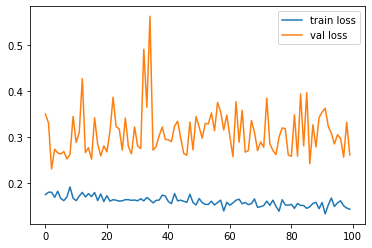

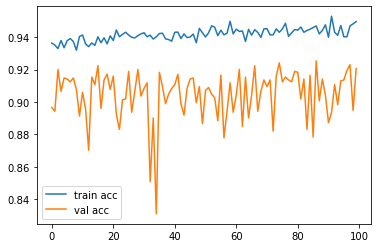

<Figure size 432x288 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# Defining Classes

In [21]:
training_set.class_indices

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

In [22]:
class_names = list(training_set.class_indices.keys())
class_names

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [23]:
count=0
for image_batch, label_batch in training_set:
#     print(label_batch)
    print(image_batch[0])
    break


[[[0.6666667  0.6039216  0.6431373 ]
  [0.6666667  0.6039216  0.6431373 ]
  [0.6666667  0.6039216  0.6431373 ]
  ...
  [0.41960788 0.35686275 0.39607847]
  [0.41960788 0.35686275 0.39607847]
  [0.41960788 0.35686275 0.39607847]]

 [[0.6711542  0.6084091  0.6476248 ]
  [0.6711542  0.6084091  0.6476248 ]
  [0.6711542  0.6084091  0.6476248 ]
  ...
  [0.3956746  0.33292946 0.37214518]
  [0.3956746  0.33292946 0.37214518]
  [0.3956746  0.33292946 0.37214518]]

 [[0.66582847 0.6030834  0.64229906]
  [0.66582847 0.6030834  0.64229906]
  [0.66582847 0.6030834  0.64229906]
  ...
  [0.38364395 0.32089883 0.36011454]
  [0.38364395 0.32089883 0.36011454]
  [0.38364395 0.32089883 0.36011454]]

 ...

 [[0.7686275  0.70980394 0.72156864]
  [0.7686275  0.70980394 0.72156864]
  [0.7686275  0.70980394 0.72156864]
  ...
  [0.44474635 0.38200122 0.3859228 ]
  [0.44474635 0.38200122 0.3859228 ]
  [0.44474635 0.38200122 0.3859228 ]]

 [[0.76135033 0.70252675 0.7142915 ]
  [0.76135033 0.70252675 0.7142915 ]


# Run prediction on a sample image

first image to predict
actual label: Tomato___Late_blight
1/1 [==============================] - 0s 62ms/step
predicted label: Tomato___Late_blight


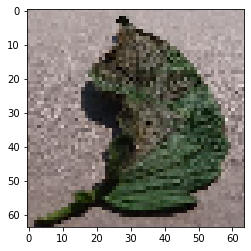

In [30]:
import numpy as np


for image_batch, label_batch in test_set:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = CNN_Classifier.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break